In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.DataFrame(data={
    'NDVI': np.stack([np.linspace(0, 0.5, 20) for x in range(20)], axis=0).flatten(),
    'tNDVI': np.stack([np.linspace(-60, 200, 20) for x in range(20)], axis=1).flatten(),
    'Stock': np.repeat(0.5, 20*20),
    'Herd': np.repeat(50, 20*20)
})

In [14]:
df['VG'] = df.apply(lambda x: 4.239054 + 6.90051*x['NDVI'] + -0.01657 * x['tNDVI'] + 0.083037*(x['NDVI'] * x['tNDVI']) + -2.10328 * x['Stock'] + -0.00108*x['Herd'], axis=1)

df['GBD'] = df.apply(lambda x: 156.0093 + -281.4*x['NDVI'] + 0.05735 * x['tNDVI'] + -2.76386*(x['NDVI'] * x['tNDVI']) + 19.25907 * x['Stock'] + -0.01356*x['Herd'], axis=1)

In [12]:
df['NDVI_bin'] = pd.cut(df['NDVI'],
                           bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                           labels=['V. Low', 'Low', 'Mod', 'High', 'V. High'])
df['dNDVI_bin'] = pd.cut(df['tNDVI'],
                           bins=[-60, 0.0, 45, 90, 135, 200],
                           labels=['V. Low', 'Low', 'Mod', 'High', 'V. High'])

Text(0.5, 0, 'Days since peak NDVI')

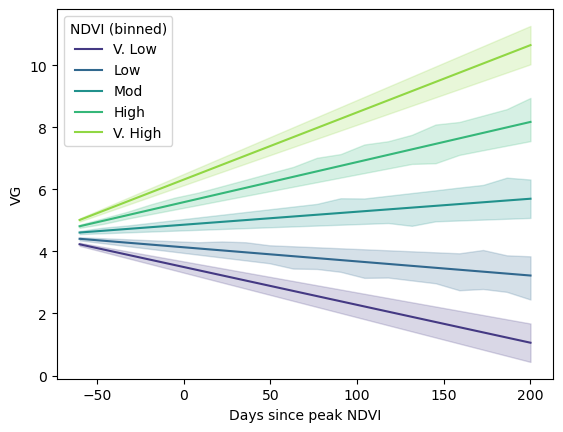

In [13]:
p = sns.lineplot(x='tNDVI', y='VG', hue='NDVI_bin', data=df, palette='viridis')
leg = p.get_legend()
leg.set_title('NDVI (binned)')
p.set_xlabel('Days since peak NDVI')

(0.0, 160.0)

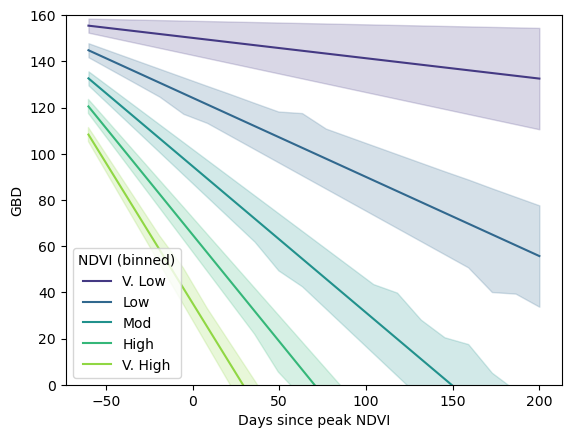

In [16]:
p = sns.lineplot(x='tNDVI', y='GBD', hue='NDVI_bin', data=df, palette='viridis')
leg = p.get_legend()
leg.set_title('NDVI (binned)')
p.set_xlabel('Days since peak NDVI')
p.set_ylim((0, 160))